## COVID-19 cases time series by country
- Source: Johns Hopkins COVID-19 time series data
- data: https://github.com/ngohoangdailong/CSSEGISandData-COVID-19/tree/master/csse_covid_19_time_series

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import json
from pandas.io.json import json_normalize
import requests
from PIL import Image
import io
import random

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Thai font in chart
plt.rcParams['font.family'] = 'Tahoma'
plt.rcParams['font.size'] = 13

# pandas display options
pd.set_option('display.max_rows', 10)

# pd.set_option('display.max_rows', None) # all rows
# pd.set_option('display.max_columns', None) # all columns
# pd.set_option('display.width', None) 
# pd.set_option('display.max_colwidth', None) 

# numpy print options
np.set_printoptions(linewidth = 1000)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
def read_covid_time_series():
    '''
    read Johns Hopkins COVID-19 time series data
    data source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
    '''
    path = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
    status = ['Confirmed', 'Deaths', 'Recovered']
    dfs = [pd.read_csv(f'{path}{s.lower()}_global.csv') for s in status]

    df = pd.concat(dfs, keys=status)

    dtmps = [pd.melt(df.loc[k],
                     id_vars=['Province/State',
                              'Country/Region', 'Lat', 'Long'],
                     var_name='Date', value_name=k) for k in status]
    dx = [d.set_index(['Province/State', 'Country/Region', 'Date'])
          for d in dtmps]
    dcovid = pd.concat(dx, axis=1)
    dcovid.reset_index(inplace=True)
    dcovid = dcovid.loc[:, ~dcovid.columns.duplicated()]
    dcovid['Date'] = pd.to_datetime(dcovid['Date'])
    dcovid = dcovid.sort_values(
        ['Country/Region', 'Province/State', 'Date']).reset_index(drop=True)
    dcountry = dcovid.groupby(
        ['Country/Region', 'Date']).sum()[['Confirmed', 'Deaths', 'Recovered']]
    dcountry.reset_index(inplace=True)
    dcountry['daily_new_patient'] = dcountry.groupby(
        ['Country/Region'])['Confirmed'].diff()
    dcountry['daily_new_patient_pct'] = dcountry.groupby(
        ['Country/Region'])['Confirmed'].pct_change()
    return dcountry

In [8]:
df = read_covid_time_series()
df

Country/Region       Date  Confirmed  Deaths  Recovered  \
0         Afghanistan 2020-01-22        0.0     0.0          0   
1         Afghanistan 2020-01-23        0.0     0.0          0   
2         Afghanistan 2020-01-24        0.0     0.0          0   
3         Afghanistan 2020-01-25        0.0     0.0          0   
4         Afghanistan 2020-01-26        0.0     0.0          0   
...               ...        ...        ...     ...        ...   
102175       Zimbabwe 2021-06-24    44306.0  1709.0      37524   
102176       Zimbabwe 2021-06-25    45217.0  1721.0      37604   
102177       Zimbabwe 2021-06-26    46018.0  1725.0      37761   
102178       Zimbabwe 2021-06-27    46442.0  1736.0      37817   
102179       Zimbabwe 2021-06-28    47284.0  1749.0      37949   

        daily_new_patient  daily_new_patient_pct  
0                     NaN                    NaN  
1                     0.0                    NaN  
2                     0.0                    NaN  
3                     0.0                    NaN  
4                     0.0                    NaN  
...                   ...                    ...  
102175              826.0               0.018997  
102176              911.0               0.020562  
102177              801.0               0.017715  
102178              424.0               0.009214  
102179              842.0               0.018130  

[102180 rows x 7 columns]

In [9]:
df[df['Country/Region'] == 'Thailand']

Country/Region       Date  Confirmed  Deaths  Recovered  \
91700       Thailand 2020-01-22        4.0     0.0          2   
91701       Thailand 2020-01-23        4.0     0.0          2   
91702       Thailand 2020-01-24        5.0     0.0          3   
91703       Thailand 2020-01-25        6.0     0.0          3   
91704       Thailand 2020-01-26        8.0     0.0          6   
...              ...        ...        ...     ...        ...   
92219       Thailand 2021-06-24   232647.0  1775.0      26873   
92220       Thailand 2021-06-25   236291.0  1819.0      26873   
92221       Thailand 2021-06-26   240452.0  1870.0      26873   
92222       Thailand 2021-06-27   244447.0  1912.0      26873   
92223       Thailand 2021-06-28   249853.0  1934.0      26873   

       daily_new_patient  daily_new_patient_pct  
91700                NaN                    NaN  
91701                0.0               0.000000  
91702                1.0               0.250000  
91703                1.0               0.200000  
91704                2.0               0.333333  
...                  ...                    ...  
92219             4108.0               0.017975  
92220             3644.0               0.015663  
92221             4161.0               0.017610  
92222             3995.0               0.016615  
92223             5406.0               0.022115  

[524 rows x 7 columns]

In [10]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',
  

### ระบุประเทศ 

In [11]:
dfilter=df[df['Country/Region'].str.contains('Thailand|Japan|Italy|Spain|Singapore|US|United Kingdom')]
dfilter

Country/Region       Date  Confirmed    Deaths  Recovered  \
44540           Italy 2020-01-22        0.0       0.0          0   
44541           Italy 2020-01-23        0.0       0.0          0   
44542           Italy 2020-01-24        0.0       0.0          0   
44543           Italy 2020-01-25        0.0       0.0          0   
44544           Italy 2020-01-26        0.0       0.0          0   
...               ...        ...        ...       ...        ...   
97459  United Kingdom 2021-06-24  4700691.0  128312.0      15712   
97460  United Kingdom 2021-06-25  4716065.0  128330.0      15718   
97461  United Kingdom 2021-06-26  4734011.0  128353.0      15718   
97462  United Kingdom 2021-06-27  4748644.0  128364.0      15722   
97463  United Kingdom 2021-06-28  4771367.0  128367.0      15729   

       daily_new_patient  daily_new_patient_pct  
44540                NaN                    NaN  
44541                0.0                    NaN  
44542                0.0                    NaN  
44543                0.0                    NaN  
44544                0.0                    NaN  
...                  ...                    ...  
97459            16705.0               0.003566  
97460            15374.0               0.003271  
97461            17946.0               0.003805  
97462            14633.0               0.003091  
97463            22723.0               0.004785  

[3668 rows x 7 columns]

COVID-19 confirmed cases (22-Jan-2020 to 28-Jun-2021)


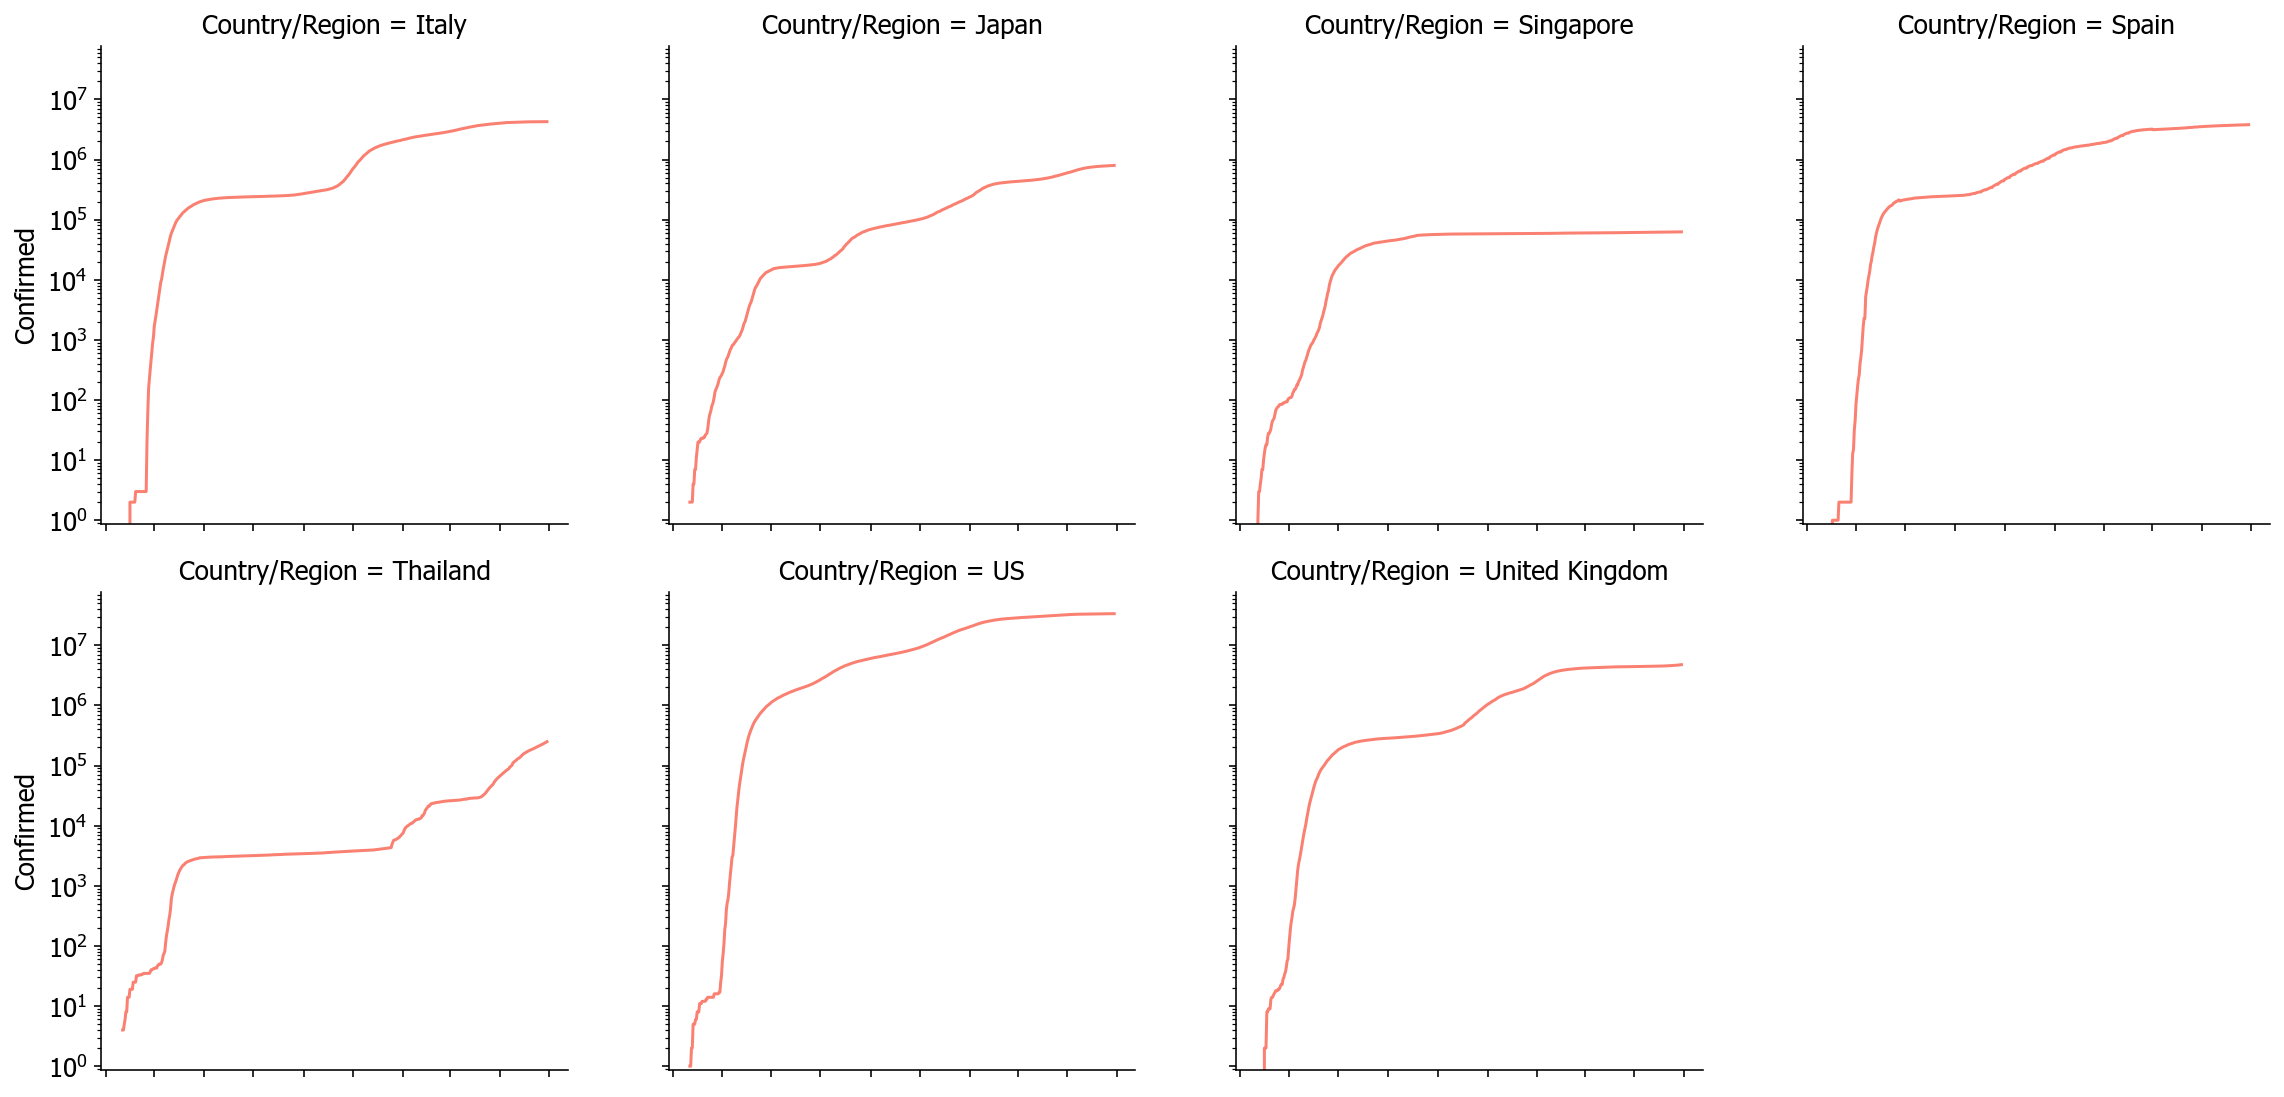

In [12]:
print(f"COVID-19 confirmed cases ({df.Date.min().strftime('%d-%b-%Y')} to {df.Date.max().strftime('%d-%b-%Y')})")

g = sns.relplot(kind='line', x="Date", y="Confirmed", data=dfilter, 
                col='Country/Region', col_wrap=4, height=4, aspect=1, color='salmon',
                facet_kws={'sharey': True, 'sharex': True})
g.set(yscale="log", xlabel='', xticklabels=[])
g;

### เลือกประเทศที่มีผู้ติดเชื้อมากกว่า n คน

In [13]:
dq=df[['Country/Region', 'Confirmed']].groupby('Country/Region').max() > 10000
dq

Confirmed
Country/Region               
Afghanistan              True
Albania                  True
Algeria                  True
Andorra                  True
Angola                   True
...                       ...
Vietnam                  True
West Bank and Gaza       True
Yemen                   False
Zambia                   True
Zimbabwe                 True

[195 rows x 1 columns]

In [14]:
country_list=dq.index[dq.Confirmed]
country_list

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country/Region', length=150)

In [15]:
dfilter=df[df['Country/Region'].isin(country_list)]

### ยอดผู้ติดเชื้อ

In [16]:
print(f"COVID-19 confirmed cases ({df.Date.min().strftime('%d-%b-%Y')} to {df.Date.max().strftime('%d-%b-%Y')})")

g = sns.relplot(kind='line', x="Date", y="Confirmed", data=dfilter, 
                col='Country/Region', col_wrap=5, height=4.5, aspect=1, color='orange',
                facet_kws={'sharey': True, 'sharex': True})
g.set(yscale="log", xlabel='', xticklabels=[])
g;

COVID-19 confirmed cases (22-Jan-2020 to 28-Jun-2021)


### ยอดผู้เสียชีวิต

In [17]:
print(f"COVID-19 confirmed cases ({df.Date.min().strftime('%d-%b-%Y')} to {df.Date.max().strftime('%d-%b-%Y')})")

g = sns.relplot(kind='line', x="Date", y="Deaths", data=dfilter, 
                col='Country/Region', col_wrap=5, height=4.5, aspect=1, color='salmon',
                facet_kws={'sharey': True, 'sharex': True})
g.set(yscale="log", xlabel='', xticklabels=[])
g;

COVID-19 confirmed cases (22-Jan-2020 to 28-Jun-2021)
